In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install scikit-learn

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

Matplotlib is building the font cache; this may take a moment.


In [5]:
iris_data = load_iris()
df = pd.DataFrame(
    data = iris_data.data,
    columns= iris_data.feature_names
)

In [6]:
df['species'] = iris_data.target
df['species_name'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

In [7]:
print("DATASET OVERVIEW")
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(iris_data.feature_names)}")
print(f"Target classes: {list(iris_data.target_names)}")

DATASET OVERVIEW
Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


In [8]:
print("\n3. DATASET INFORMATION")
print("-" * 30)
print(df.info())


3. DATASET INFORMATION
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    int64   
 5   species_name       150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB
None


In [9]:
print("\n4. BASIC STATISTICS")
print("-" * 30)
print(df.describe())


4. BASIC STATISTICS
------------------------------
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [10]:
print("\n5. TARGET DISTRIBUTION")
print("-" * 30)
print("Class distribution:")
print(df['species_name'].value_counts().sort_index())
print("\nClass percentages:")
print(df['species_name'].value_counts(normalize=True).sort_index().round(3))


5. TARGET DISTRIBUTION
------------------------------
Class distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Class percentages:
species_name
setosa        0.333
versicolor    0.333
virginica     0.333
Name: proportion, dtype: float64


In [11]:
missing_values = df.isnull().sum()
print(missing_values)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


In [12]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Duplicate rows: 1


In [13]:
print(f"\nData types:")
print(df.dtypes)


Data types:
sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species                 int64
species_name         category
dtype: object


In [14]:
print(f"\n7. DATA RANGE ANALYSIS")
print("-" * 30)
print("Feature ranges:")
for col in iris_data.feature_names:
    print(f"{col}: {df[col].min():.2f} to {df[col].max():.2f}")


7. DATA RANGE ANALYSIS
------------------------------
Feature ranges:
sepal length (cm): 4.30 to 7.90
sepal width (cm): 2.00 to 4.40
petal length (cm): 1.00 to 6.90
petal width (cm): 0.10 to 2.50


In [15]:
print(f"\n8. POTENTIAL OUTLIERS (IQR Method)")
print("-" * 30)
for col in iris_data.feature_names:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{col}: {len(outliers)} potential outliers')


8. POTENTIAL OUTLIERS (IQR Method)
------------------------------
sepal length (cm): 0 potential outliers
sepal width (cm): 4 potential outliers
petal length (cm): 0 potential outliers
petal width (cm): 0 potential outliers


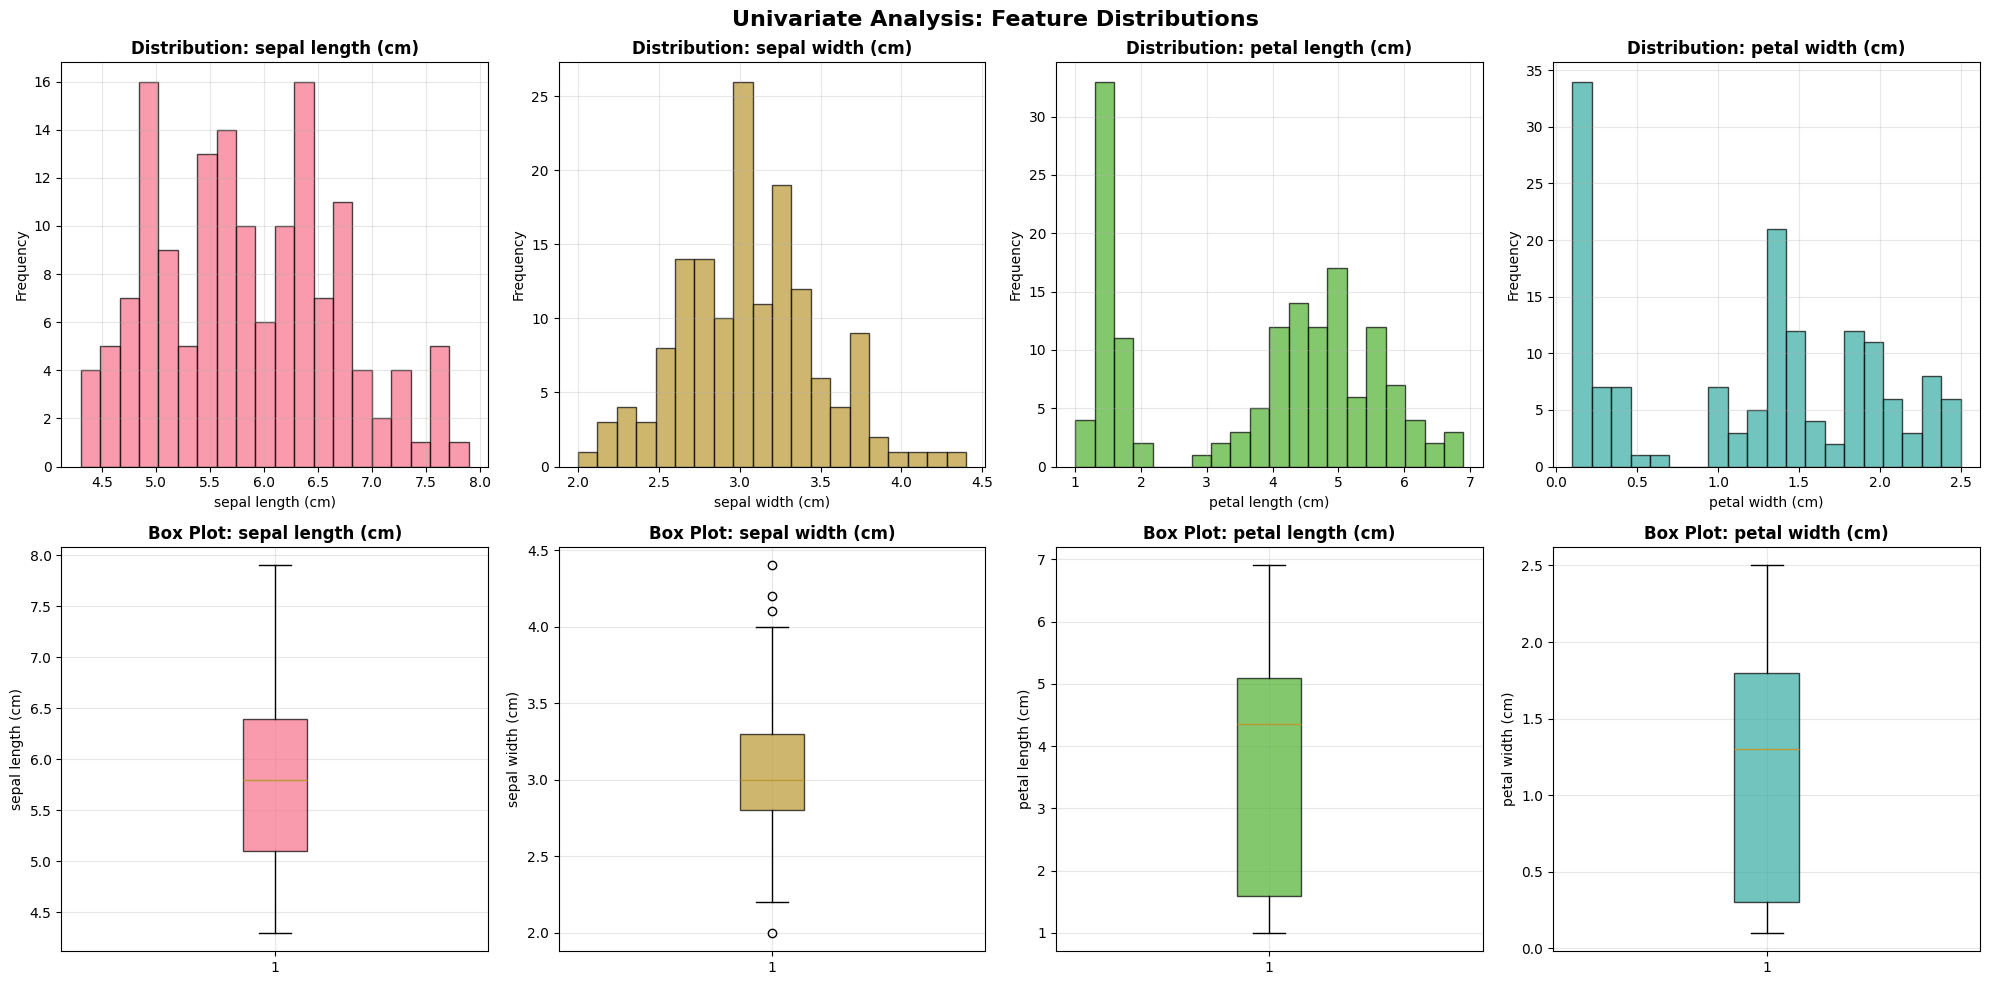

In [17]:
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12,8)
fig , axes = plt.subplots(2,4, figsize=(20,10))
fig.suptitle('Univariate Analysis: Feature Distributions', fontsize=16, fontweight='bold')
feature_names = iris_data.feature_names
for i, feature in enumerate(feature_names):
    axes[0, i].hist(df[feature], bins=20, alpha=0.7, color=sns.color_palette("husl")[i], edgecolor='black')
    axes[0, i].set_title(f'Distribution: {feature}', fontweight='bold')
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)

for i, feature in enumerate(feature_names):
    axes[1, i].boxplot(df[feature], patch_artist=True, 
                       boxprops=dict(facecolor=sns.color_palette("husl")[i], alpha=0.7))
    axes[1, i].set_title(f'Box Plot: {feature}', fontweight='bold')
    axes[1, i].set_ylabel(feature)
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


 TARGET ANALYSIS
--------------------------------------------------


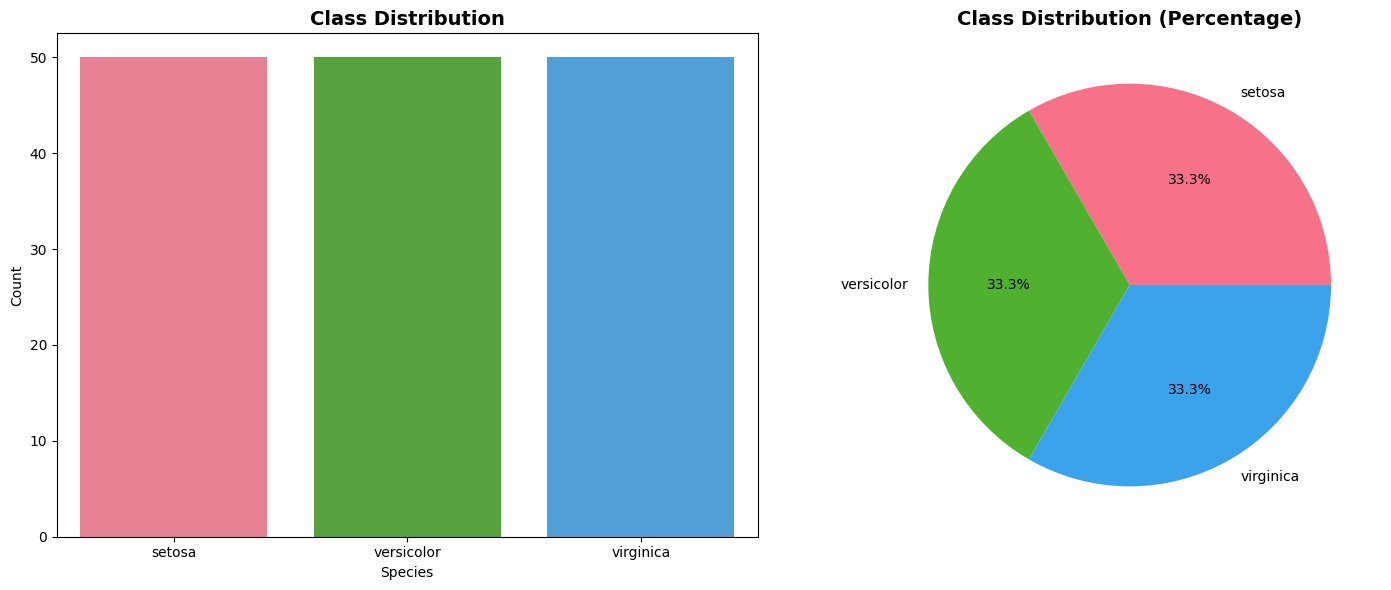

In [21]:
print("\n TARGET ANALYSIS")
print("-" * 50)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='species_name', ax=axes[0], hue='species_name', palette='husl', legend=False)
axes[0].set_title('Class Distribution', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Count')

species_counts = df['species_name'].value_counts()
axes[1].pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette("husl", 3))
axes[1].set_title('Class Distribution (Percentage)', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

In [23]:
print("\n FEATURE STATISTICS BY SPECIES")
print("-" * 50)
species_stats = df.groupby('species_name', observed=True)[feature_names].agg(['mean', 'std']).round(2)
print(species_stats)



 FEATURE STATISTICS BY SPECIES
--------------------------------------------------
             sepal length (cm)       sepal width (cm)       petal length (cm)  \
                          mean   std             mean   std              mean   
species_name                                                                    
setosa                    5.01  0.35             3.43  0.38              1.46   
versicolor                5.94  0.52             2.77  0.31              4.26   
virginica                 6.59  0.64             2.97  0.32              5.55   

                   petal width (cm)        
               std             mean   std  
species_name                               
setosa        0.17             0.25  0.11  
versicolor    0.47             1.33  0.20  
virginica     0.55             2.03  0.27  



 BIVARIATE ANALYSIS
--------------------------------------------------
Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)              1.000            -0.118              0.872   
sepal width (cm)              -0.118             1.000             -0.428   
petal length (cm)              0.872            -0.428              1.000   
petal width (cm)               0.818            -0.366              0.963   

                   petal width (cm)  
sepal length (cm)             0.818  
sepal width (cm)             -0.366  
petal length (cm)             0.963  
petal width (cm)              1.000  


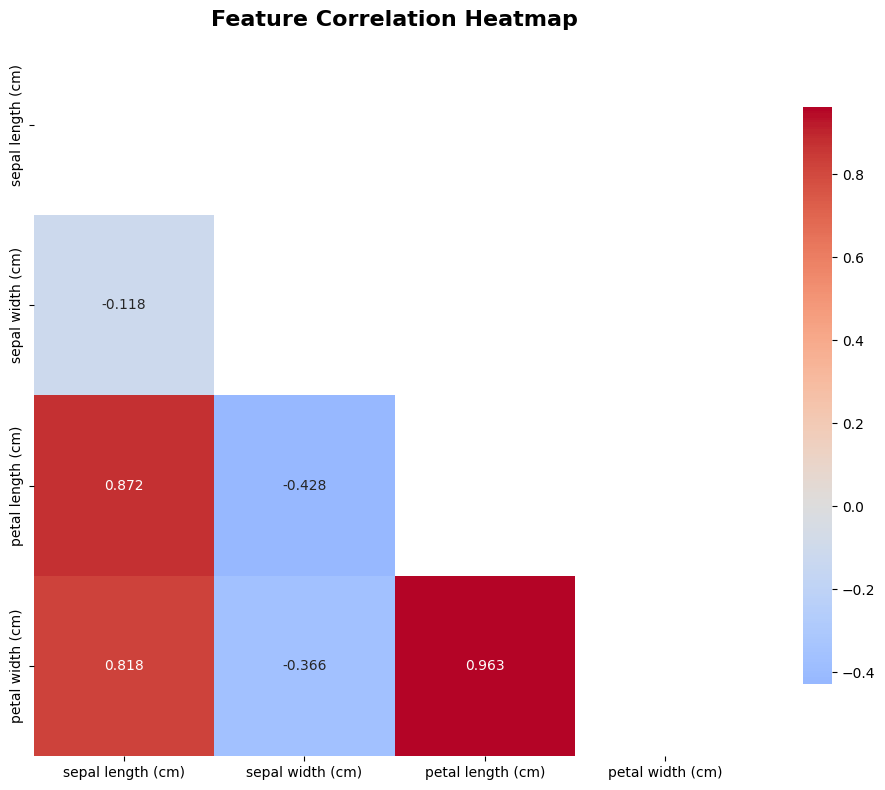

In [25]:
print("\n BIVARIATE ANALYSIS")
print("-" * 50)

correlation_matrix = df[feature_names].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8}, mask=mask)
plt.title('Feature Correlation Heatmap', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()


PAIR PLOT ANALYSIS
--------------------------------------------------


<Figure size 1500x1200 with 0 Axes>

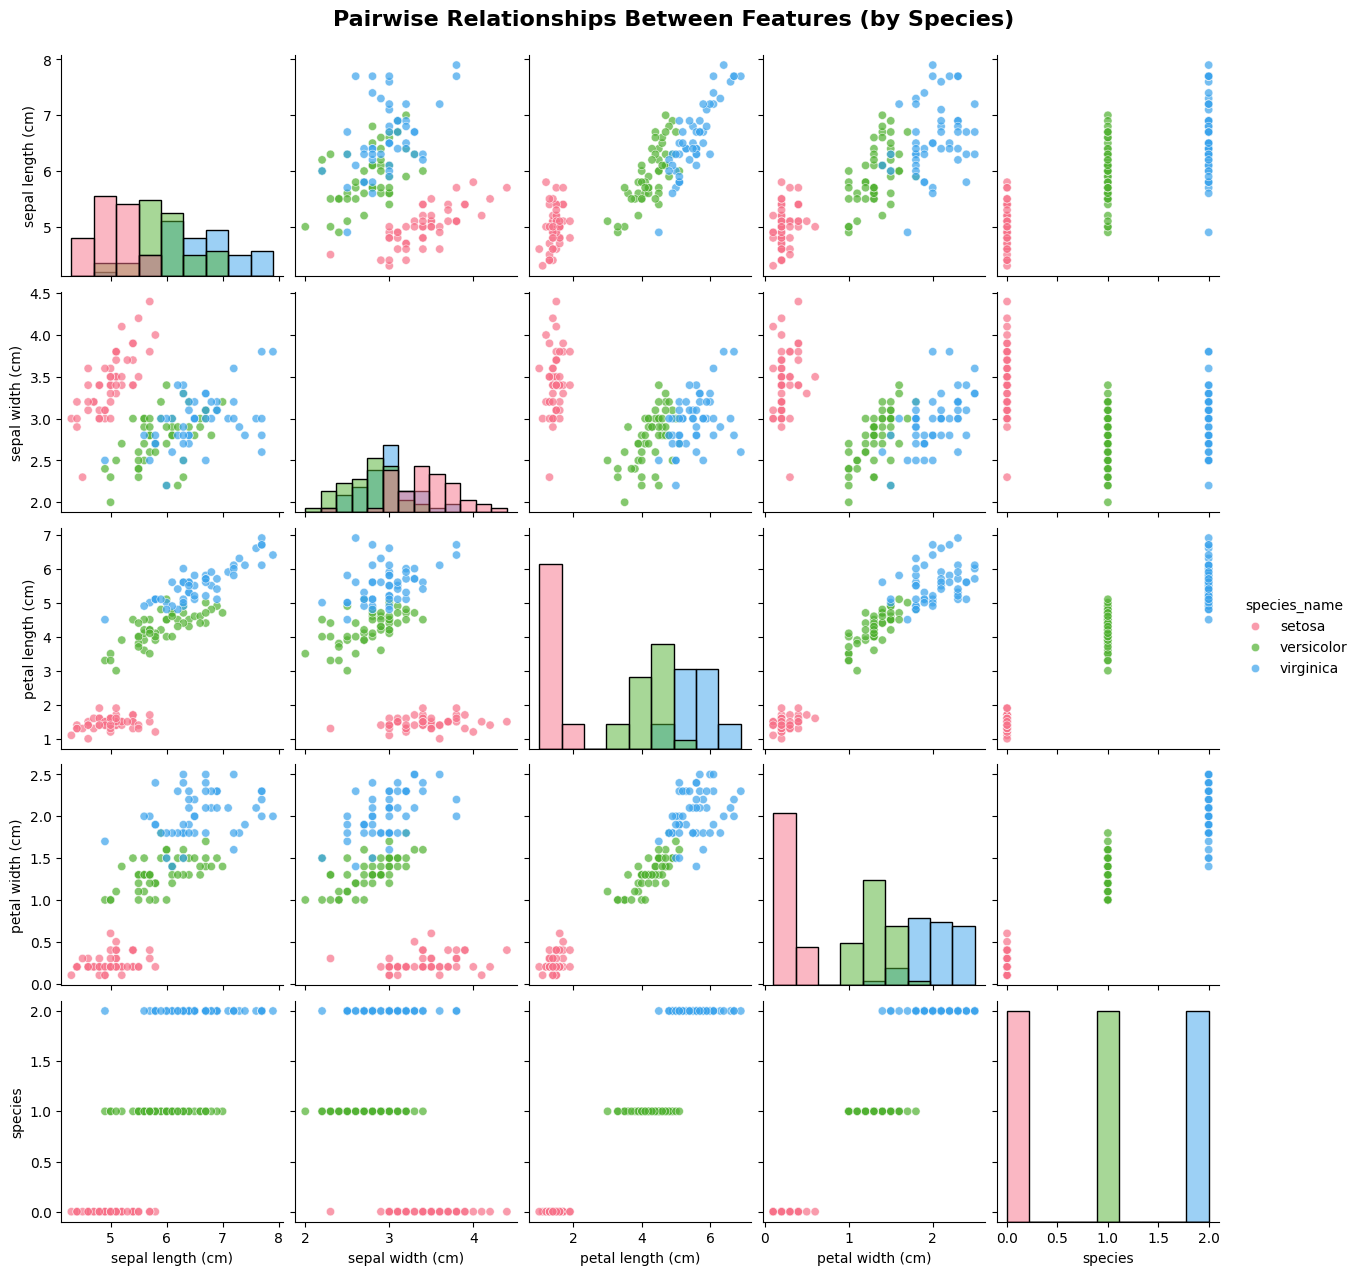

In [26]:
print("\nPAIR PLOT ANALYSIS")
print("-" * 50)

plt.figure(figsize=(15, 12))
pair_plot = sns.pairplot(df, hue='species_name', palette='husl', 
                        diag_kind='hist', plot_kws={'alpha': 0.7})
pair_plot.fig.suptitle('Pairwise Relationships Between Features (by Species)', 
                       fontsize=16, fontweight='bold', y=1.02)
plt.show()


 FEATURE DISTRIBUTIONS BY SPECIES


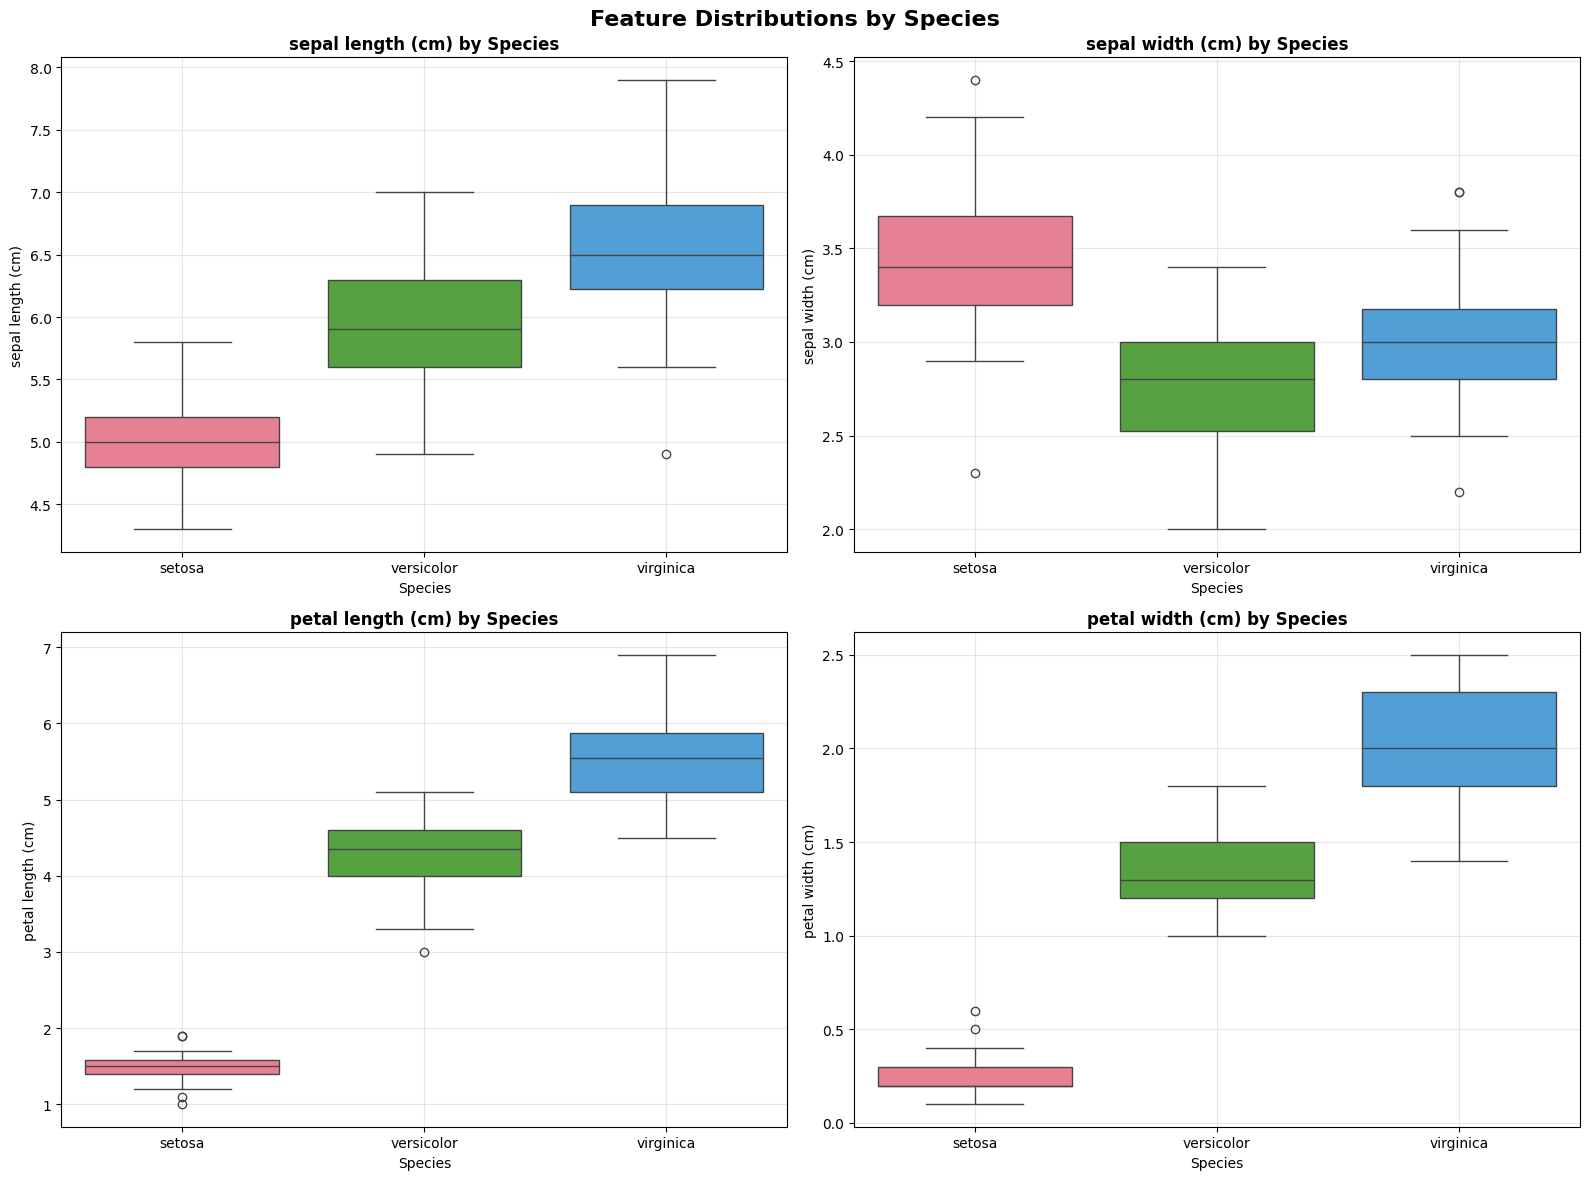

In [28]:
print("\n FEATURE DISTRIBUTIONS BY SPECIES")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Feature Distributions by Species', fontsize=16, fontweight='bold')

for i, feature in enumerate(feature_names):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df, x='species_name', y=feature, ax=axes[row, col], hue='species_name', palette='husl', legend=False)
    axes[row, col].set_title(f'{feature} by Species', fontweight='bold')
    axes[row, col].set_xlabel('Species')
    axes[row, col].set_ylabel(feature)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [31]:
print("\n1. FEATURE DISCRIMINATION ANALYSIS")
print("-" * 50)

cv_analysis = []
for feature in feature_names:
    species_means = df.groupby('species_name', observed=True)[feature].mean()
    overall_mean = df[feature].mean()
    between_species_var = ((species_means - overall_mean) ** 2).mean()
    within_species_var = df.groupby('species_name', observed=True)[feature].var().mean()
    
    discrimination_ratio = between_species_var / within_species_var if within_species_var > 0 else 0
    
    cv_analysis.append({
        'Feature': feature,
        'Between_Species_Variance': between_species_var,
        'Within_Species_Variance': within_species_var,
        'Discrimination_Ratio': discrimination_ratio
    })

cv_df = pd.DataFrame(cv_analysis).sort_values('Discrimination_Ratio', ascending=False)
print("Feature Discrimination Ranking (Higher = Better for Classification):")
print(cv_df.round(3))


1. FEATURE DISCRIMINATION ANALYSIS
--------------------------------------------------
Feature Discrimination Ranking (Higher = Better for Classification):
             Feature  Between_Species_Variance  Within_Species_Variance  \
2  petal length (cm)                     2.914                    0.185   
3   petal width (cm)                     0.536                    0.042   
0  sepal length (cm)                     0.421                    0.265   
1   sepal width (cm)                     0.076                    0.115   

   Discrimination_Ratio  
2                15.735  
3                12.800  
0                 1.590  
1                 0.655  


In [32]:
X = df[iris_data.feature_names].copy()
y = df['species'].copy()
print(f"\nORIGINAL DATASET INFO")
print("-" * 40)
print(f"Total samples: {len(X)}")
print(f"Features: {X.shape[1]}")
print(f"Classes: {len(np.unique(y))}")
print(f"Class distribution:")
for i, class_name in enumerate(iris_data.target_names):
    count = sum(y == i)
    percentage = (count / len(y)) * 100
    print(f"  {class_name}: {count} samples ({percentage:.1f}%)")


ORIGINAL DATASET INFO
----------------------------------------
Total samples: 150
Features: 4
Classes: 3
Class distribution:
  setosa: 50 samples (33.3%)
  versicolor: 50 samples (33.3%)
  virginica: 50 samples (33.3%)


In [33]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.15,          
    random_state=42,          
    stratify=y                
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.176,          
    random_state=42,
    stratify=y_temp
)
splits_info = {
    'Training': (len(X_train), len(X_train)/len(X) * 100),
    'Validation': (len(X_val), len(X_val)/len(X) * 100),
    'Test': (len(X_test), len(X_test)/len(X) * 100)
}

print("Split sizes:")
for split_name, (size, percentage) in splits_info.items():
    print(f"  {split_name:12}: {size:3d} samples ({percentage:4.1f}%)")

print(f"\nSTRATIFICATION VERIFICATION")
print("-" * 40)
def check_class_distribution(y_split, split_name):
    print(f"{split_name} set class distribution:")
    for i, class_name in enumerate(iris_data.target_names):
        count = sum(y_split == i)
        percentage = (count / len(y_split)) * 100
        print(f"  {class_name}: {count} samples ({percentage:.1f}%)")

check_class_distribution(y_train, "Training")
check_class_distribution(y_val, "Validation")
check_class_distribution(y_test, "Test")

Split sizes:
  Training    : 104 samples (69.3%)
  Validation  :  23 samples (15.3%)
  Test        :  23 samples (15.3%)

STRATIFICATION VERIFICATION
----------------------------------------
Training set class distribution:
  setosa: 35 samples (33.7%)
  versicolor: 34 samples (32.7%)
  virginica: 35 samples (33.7%)
Validation set class distribution:
  setosa: 8 samples (34.8%)
  versicolor: 8 samples (34.8%)
  virginica: 7 samples (30.4%)
Test set class distribution:
  setosa: 7 samples (30.4%)
  versicolor: 8 samples (34.8%)
  virginica: 8 samples (34.8%)
